In [1]:
#import pandas as pd
import polars as pl
import numpy as np
import datetime as dt
import geopandas as gpd

from scipy.stats import mode

import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Visualization/Utilities')
import Viz_Utils as vutil

In [2]:
%%time
tdf = pl.read_csv(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\IMS (1 km)\Outputs\IMS_pSnow_CanadaTiles60km.csv")

tdf = tdf.with_columns(pl.col('time').str.to_date())

t_cols = tdf.select(pl.exclude('time')).columns
tdf = tdf.with_columns(pl.col(t_cols).cast(pl.Float32))

#tdf.write_csv('IMS_pSnow_CanadaTiles60km.csv')

tdf

CPU times: total: 28 s
Wall time: 11.3 s


time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,…,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390
date,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
2018-01-01,100.0,100.0,40.928074,0.0,100.0,100.0,75.138885,16.926771,0.338409,95.527153,100.0,99.416664,93.126572,14.285714,87.5,3.900709,80.944443,100.0,100.0,99.5,100.0,4.0,94.111115,100.0,100.0,61.607143,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,63.56546,46.033897,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-02,100.0,100.0,40.928074,0.0,100.0,100.0,73.055557,16.926771,0.338409,95.527153,100.0,99.416664,91.86924,14.179894,87.5,3.900709,80.944443,100.0,100.0,99.5,100.0,4.0,94.111115,100.0,100.0,61.607143,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,63.56546,46.033897,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-03,100.0,100.0,40.928074,0.0,100.0,100.0,73.055557,16.926771,0.338409,95.527153,100.0,99.416664,91.86924,14.179894,87.5,3.900709,80.944443,100.0,100.0,99.5,100.0,4.0,94.111115,100.0,100.0,61.607143,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,63.56546,46.033897,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-04,100.0,100.0,40.928074,0.0,100.0,100.0,73.055557,16.926771,0.338409,95.527153,100.0,99.416664,91.86924,14.179894,87.5,3.900709,80.944443,100.0,100.0,99.5,100.0,4.0,94.111115,100.0,100.0,61.607143,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,63.56546,46.033897,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
2018-01-05,100.0,99.103142,95.359627,0.0,100.0,100.0,87.888885,29.171669,3.891709,100.0,100.0,94.916664,97.122101,25.978836,0.0,13.711584,80.944443,100.0,100.0,83.472221,86.337212,4.0,94.111115,100.0,100.0,45.44931,6.304729,0.0,2.230239,68.555557,100.0,100.0,97.111115,63.56546,46.033897,33.385826,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.888855,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.64286,100.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-12-27,10.0,45.195389,1.206496,0.0,0.0,78.601204,65.861115,0.20008,0.0,68.610222,98.222221,76.305557,48.700756,1.746032,0.0,0.0,63.083332,100.0,100.0,73.5,62.306202,0.0,75.583336,100.0,100.0,40.956223,1.225919,0.0,0.0,58.972221,98.805557,98.027779,92.027779,55.013927,13.016949,0.0,…,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2024-12-28,0.0,0.0,0.0,0.0,0.0,21.167208,0.0,0.0,0.0,29.153355,26.833334,12.75,0.0,0.0,0.0,0.0,63.083332,99.083336,68.888885,36.111111,47.868

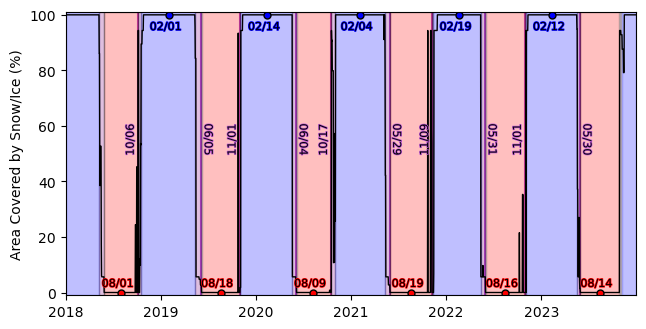

In [3]:
zone = '904'
plot = vutil.timeSeriesPlot(tdf[0:2191], zone, form = 'ims', save = 'Figure 5.tif')